In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train= pd.read_csv('../input/titanic/titanic.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Exploratory Data Analysis

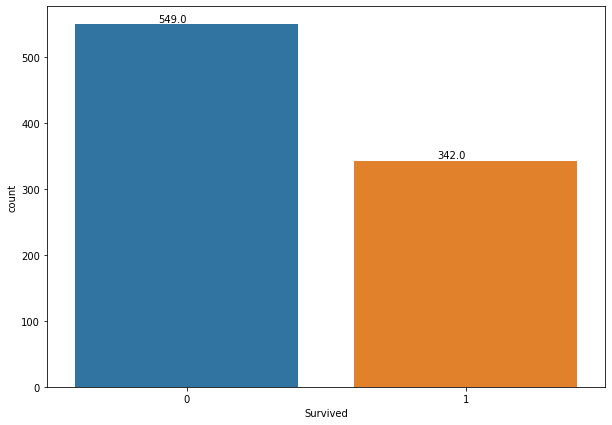

In [6]:
###  Number of unique values in 'Survived' Feature
plt.figure(figsize=(10, 7))
ax=sns.countplot('Survived', data= df_train)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+4))

Maximum number of people are not survived in the accidient.

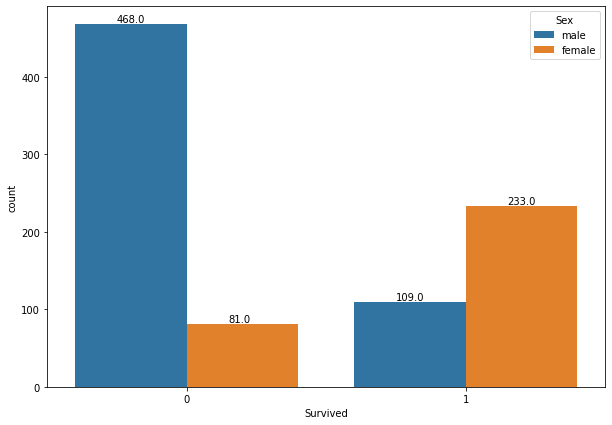

In [7]:
###  Number of unique values in 'Survived' feature according to 'Sex'
plt.figure(figsize=(10, 7))
ax=sns.countplot(x='Survived', hue= 'Sex', data= df_train)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+3))

More the number of 'Males' passengers are died as compared to 'Females' passengers

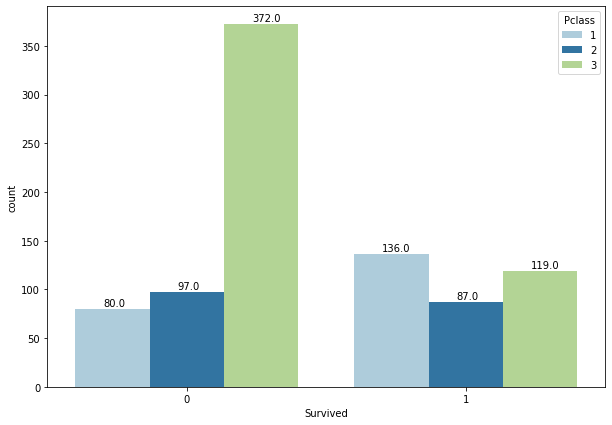

In [8]:
### Number of Survived and Not-Survives according to 'Pclass' feature.
plt.figure(figsize=(10, 7))
ax= sns.countplot(x= 'Survived', hue= 'Pclass', palette= 'Paired', data= df_train)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+3))

Passenger from 'Pclass=3' are died more as comapre to the passenger of 'Pclass=1 and 2'. 

<Figure size 720x504 with 0 Axes>

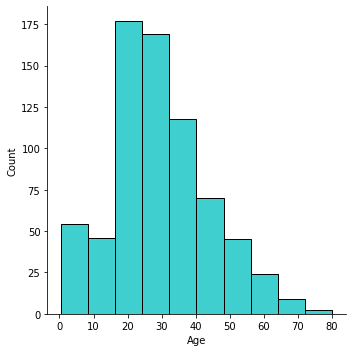

In [9]:
plt.figure(figsize=(10, 7))
sns.displot(df_train['Age'].dropna(), color= 'c', bins=10)

Majority of Passenger were from 'Age' between 28 to 32 years.

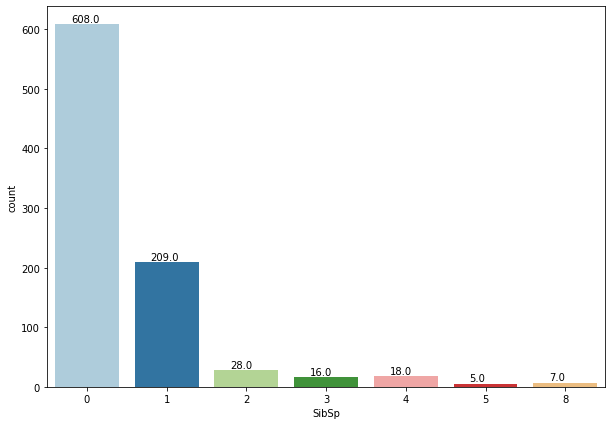

In [10]:
### Number of Passenger with their 'SibSp'
plt.figure(figsize=(10, 7))
ax= sns.countplot(x= 'SibSp', palette= 'Paired', data= df_train)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+3.9))

Maximum number of passengers were travelling 'Alone'.

### Data-Cleaning and Treating the 'NaN' Values

In [11]:
### To Get the features name with 'NaN' values
df_train.columns[df_train.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [12]:
### Get the 'Precentage' of the feature with 'NaN' values
print(round(df_train.isna().mean(), 4)*100)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

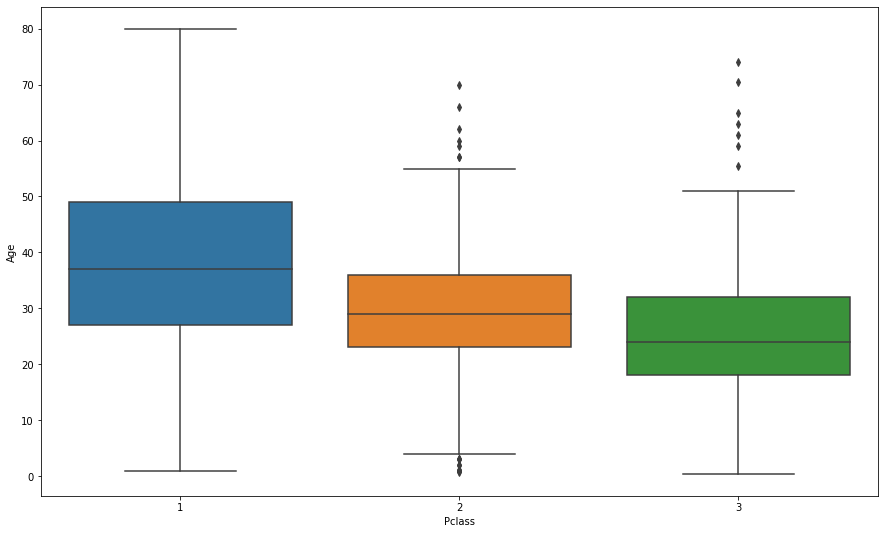

In [13]:
plt.figure(figsize=(15, 9))
sns.boxplot(y= df_train['Age'], x= df_train['Pclass'])

In [14]:
### Fill 'Nan' Values for Age accordingly with Pclass mean
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return df_train[df_train['Pclass']==1]['Age'].mean()
        elif Pclass==2:
            return df_train[df_train['Pclass']==2]['Age'].mean()
        elif Pclass==3:
            return df_train[df_train['Pclass']==3]['Age'].mean()
    else:
        return Age

In [15]:
# df_train['Age']= df_train[['Age', 'Pclass']].apply(impute_age, axis=1)
df_train['Age']= df_train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [16]:
### We can drop the 'Cabin' Feature as more than 50% values are 'NaN'
df_train.drop('Cabin', axis=1, inplace= True)

In [17]:
### We know that 'Embarked' feature has only 0.22% of 'NaN' values. So, we can drop that 'Observations/Records'
df_train.dropna(axis= 0, inplace= True)

In [18]:
### Features like 'PassengerId', 'Name', 'Ticket' do not play important role in our model so, we can drop these features
df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace= True)

In [19]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
### Now we have to do 'Lable-Encoding' of feature  like 'Sex' and 'Embarked' as they are in categories
df_train['Sex']= df_train['Sex'].map({'female': 0, 'male': 1})
df_train['Embarked']= df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [21]:
### Checking the skewness of features, we want our feature to be normally skeweed
df_train.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.507710
SibSp       3.691058
Parch       2.745160
Fare        4.801440
Embarked    1.539926
dtype: float64

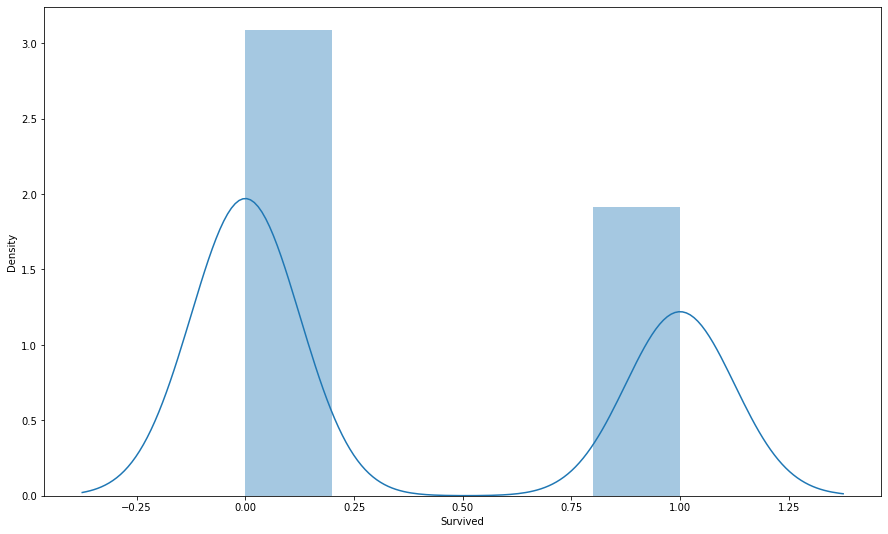

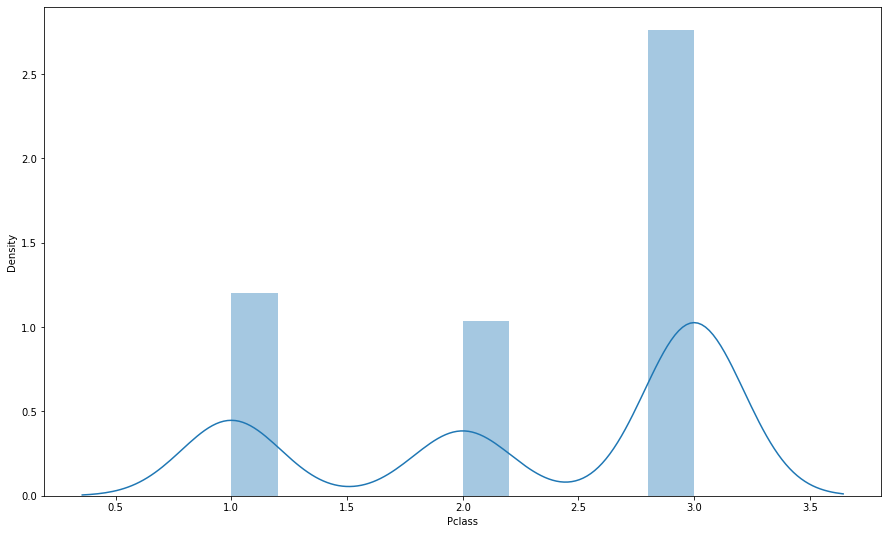

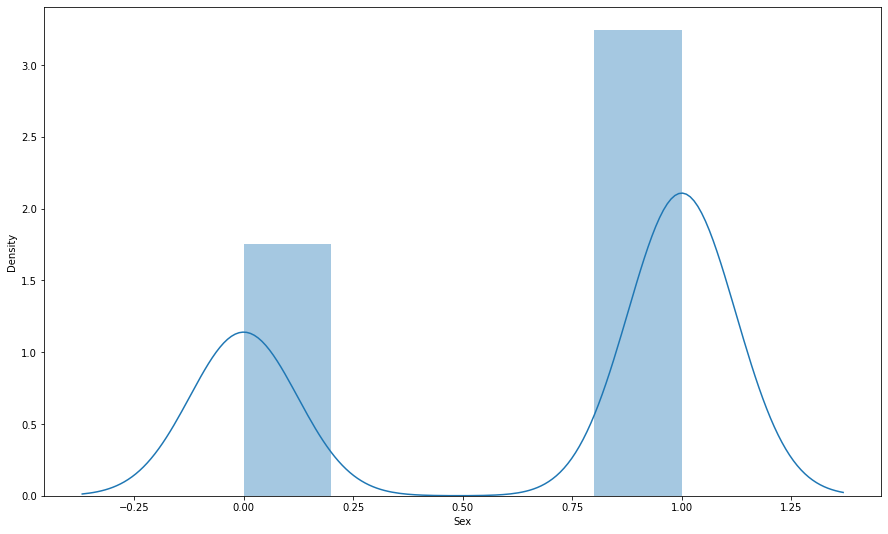

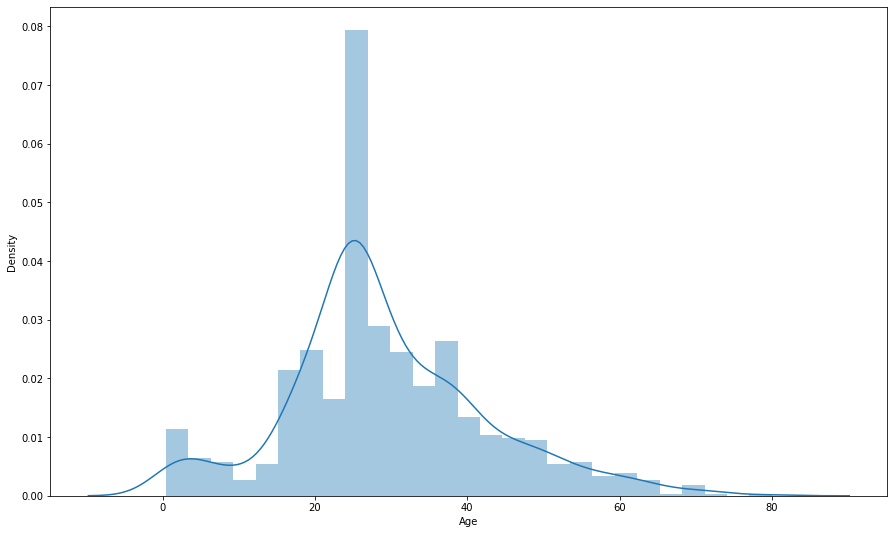

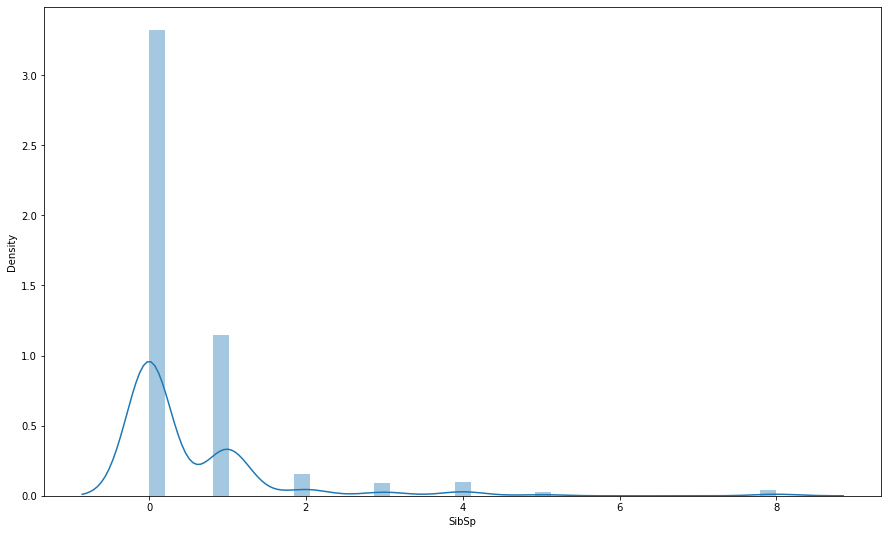

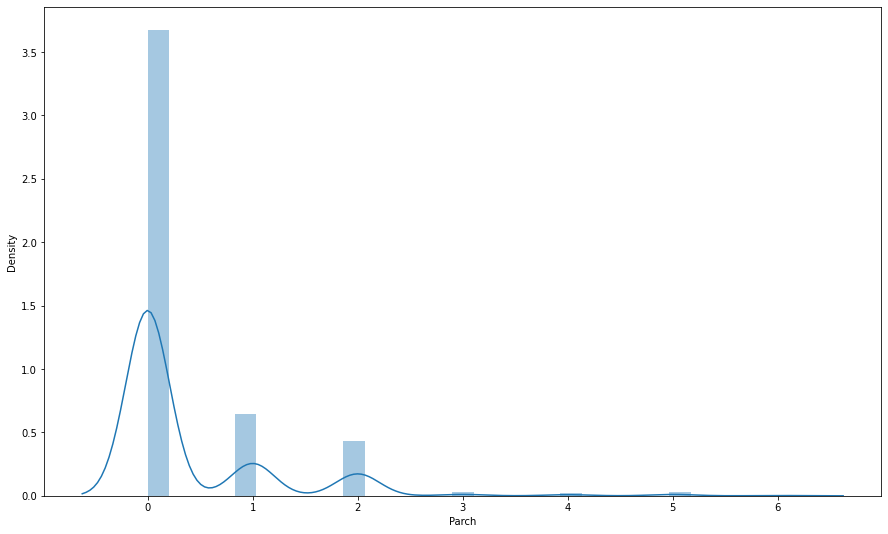

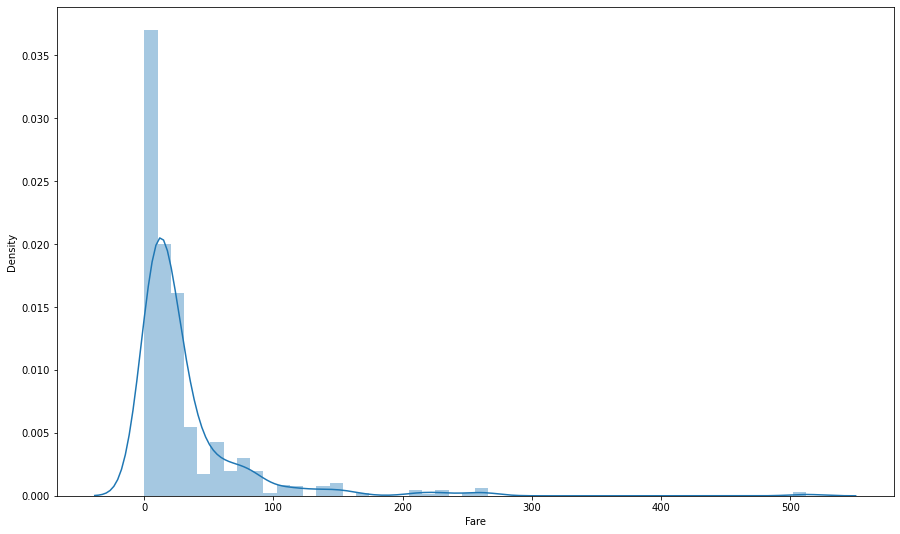

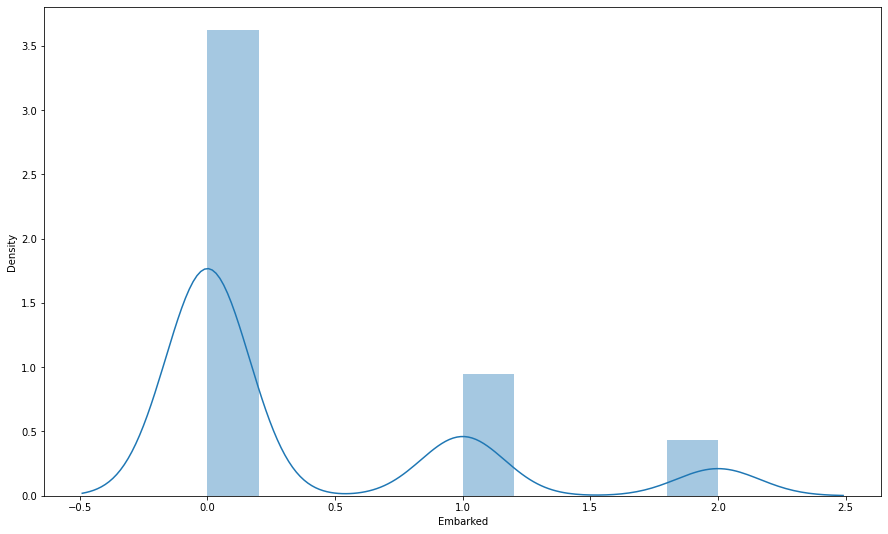

In [22]:
for features in df_train.columns:
    plt.figure(figsize= (15, 9))
    sns.distplot(df_train[features])
    plt.plot()

'Fare' feature is positively Skewed. So we have to transform it to Normally distributed.

In [23]:
df_train['Fare']= np.cbrt(df_train['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

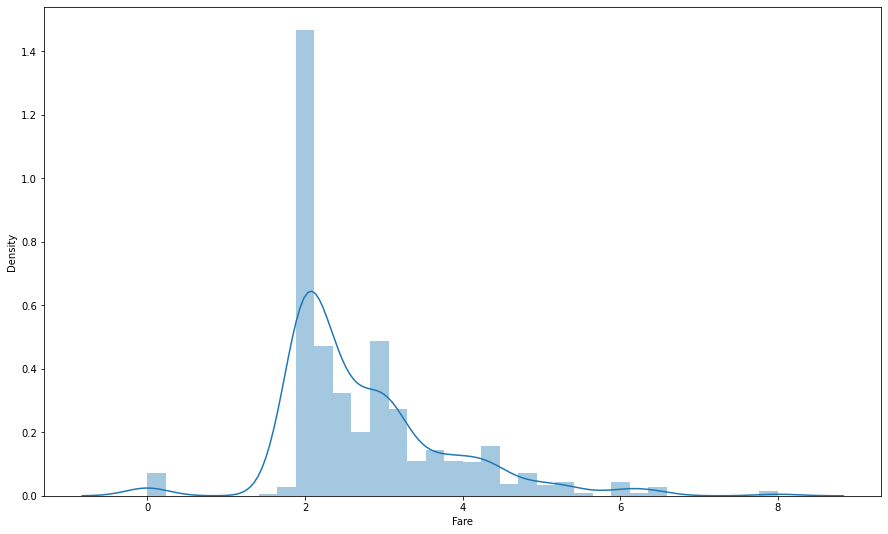

In [24]:
plt.figure(figsize= (15, 9))
sns.distplot(df_train['Fare'])

In [25]:
### Now we have to do  'One-Hot Encoding' of the features.
df_train= pd.get_dummies(df_train, drop_first= True, columns= ['Pclass', 'Sex', 'Embarked', 'Parch', 'SibSp'])

In [26]:
df_train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_1,Embarked_1,Embarked_2,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,22.0,1.935438,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,38.0,4.146318,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,26.0,1.993730,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,35.0,3.758647,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,35.0,2.004158,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Building The ML Model 
- Extreme Gradient Boosting

In [27]:
X= df_train.drop('Survived', axis=1)
y= df_train['Survived']

In [28]:
### Split model into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 2022, stratify= y)

In [29]:
### Now scale the data. So, that its mean= 0 and standard daviation= 1
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [30]:
X_train_scaler= scaler.fit_transform(X_train) # For train data we do fit and transform both
X_test_sclaer= scaler.transform(X_test)  # For test data we only transform

In [31]:
### Import XGB Library
from xgboost import XGBClassifier
Xgb_classi= XGBClassifier(learning_rate = 0.09,
                          booster= 'dart',
                          max_depth = 4)

In [32]:
model = Xgb_classi.fit(X_train_scaler, y_train)

[03:53:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [33]:
### Predicting the test values
y_pred= model.predict(X_test_sclaer)

### Evaluating the Model

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:

print(f'The Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'The Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'The Classification Report:\n {classification_report(y_test, y_pred)}')


The Accuracy Score: 0.8164794007490637


The Confusion Matrix:
 [[147  18]
 [ 31  71]]


The Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       165
           1       0.80      0.70      0.74       102

    accuracy                           0.82       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



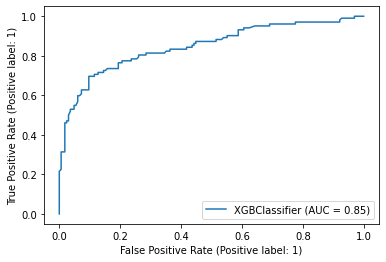

In [36]:
### Roc_curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test_sclaer, y_test)

### Since the performance of model is not up to the mark we can perfrom Hyperparameter Tuning Techniques.